# Anomaly Detection using Unsupervised Techniques

Anomaly detection is the identification of data points, items, observations or events that do not conform to the expected pattern of a given group. These anomalies occur very infrequently but may signify a large and significant threat such as cyber intrusions or fraud. Anomaly detection is heavily used in behavioral analysis and other forms of analysis in order to aid in learning about the detection, identification and prediction of the occurrence of these anomalies.

### Importing the data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
## importing the data
## pressure sensors are imported as PS. There are around 6 pressure sensors. They are named as ps1, ps2, ps3, ps4, ps5, ps6. 

df_ps1 = pd.read_csv('PS1.txt', delimiter = '\t', header = None)
df_ps2 = pd.read_csv('PS2.txt', delimiter = '\t', header = None)
df_ps3 = pd.read_csv('PS3.txt', delimiter = '\t', header = None)
df_ps4 = pd.read_csv('PS4.txt', delimiter = '\t', header = None)
df_ps5 = pd.read_csv('PS5.txt', delimiter = '\t', header = None)
df_ps6 = pd.read_csv('PS6.txt', delimiter = '\t', header = None)


In [3]:
## cooling efficiency and cooling power are imported as ce and cp respectively. 

df_ce = pd.read_csv('CE.txt',delimiter = '\t', header = None)
df_cp = pd.read_csv('CP.txt', delimiter = '\t', header = None)


In [4]:
# temperature sensors are imported as ts. There are around 4 pressure sensors. They are named as ts1, ts2, ts3, ts4.

df_ts1 = pd.read_csv('TS1.txt', delimiter = '\t', header = None)
df_ts2 = pd.read_csv('TS2.txt', delimiter = '\t', header = None)
df_ts3 = pd.read_csv('TS3.txt', delimiter = '\t', header = None)
df_ts4 = pd.read_csv('TS4.txt', delimiter = '\t', header = None)


In [5]:
# flow sensors are imported as fs. There are around 2 pressure sensors. They are named as fs1, fs2.

df_fs1 = pd.read_csv('FS1.txt', delimiter = '\t', header = None)
df_fs2 = pd.read_csv('FS2.txt', delimiter = '\t', header = None)


In [6]:
# motor power sensors is imported as eps. 
# vibration sensors is imported as vs
# efficiency power is imported as se

df_eps1 = pd.read_csv('EPS1.txt', delimiter = '\t', header = None)
df_se = pd.read_csv('SE.txt', delimiter = '\t', header = None)
df_vs1 = pd.read_csv('VS1.txt', delimiter = '\t', header = None)



In [7]:
## function for defining variables like ps1_1, ps1_2 for 17 sensors with different sampling rates

def col(n, var):
    l = []
    for i in range(1,n):
        temp = str(var) + '_' + '%d' %i
        l.append(temp)
    return l


In [8]:
# 
df_ps1.columns = col(6001,'ps1')
df_ps2.columns = col(6001,'ps2')
df_ps3.columns = col(6001,'ps3')
df_ps4.columns = col(6001,'ps4')
df_ps5.columns = col(6001,'ps5')
df_ps6.columns = col(6001,'ps6')




In [9]:
df_ts1.columns = col(61,'ts1')
df_ts2.columns = col(61,'ts2')
df_ts3.columns = col(61,'ts3')
df_ts4.columns = col(61,'ts4')


In [10]:
df_eps1.columns = col(6001,'eps1')

In [11]:
df_fs1.columns = col(601,'fs1')
df_fs2.columns = col(601,'fs2')

In [12]:
df_vs1.columns = col(61,'vs1')

In [13]:
df_ce.columns = col(61,'ce')

In [14]:
df_cp.columns = col(61,'cp')

In [15]:
df_se.columns = col(61,'se')

In [16]:
df_ps = pd.concat([df_ps1, df_ps2, df_ps3, df_ps4, df_ps5, df_ps6], axis = 1)
df_ts = pd.concat([df_ts1, df_ts2, df_ts3, df_ts4], axis = 1)
df_fs = pd.concat([df_fs1, df_fs2], axis = 1)
df_vir = pd.concat([df_cp, df_ce, df_eps1, df_se, df_vs1], axis = 1)


In [17]:
df = pd.concat([df_ps, df_ts, df_fs, df_vir], axis = 1)
df.head()

,ps1_1,ps1_2,ps1_3,ps1_4,ps1_5,ps1_6,ps1_7,ps1_8,ps1_9,ps1_10,...,vs1_51,vs1_52,vs1_53,vs1_54,vs1_55,vs1_56,vs1_57,vs1_58,vs1_59,vs1_60
0,151.47,151.45,151.52,151.27,150.80,150.69,153.89,154.67,152.88,153.82,...,0.554,0.552,0.545,0.553,0.553,0.539,0.544,0.545,0.535,0.543
1,151.11,151.12,151.16,150.92,150.70,150.62,152.40,153.21,152.81,153.53,...,0.555,0.547,0.548,0.544,0.536,0.542,0.540,0.533,0.531,0.534
2,150.81,150.79,150.84,150.65,150.35,150.23,152.03,152.81,152.44,153.27,...,0.543,0.544,0.543,0.554,0.544,0.544,0.545,0.544,0.530,0.534
3,150.48,150.47,150.52,150.31,150.04,149.98,151.63,152.48,152.24,152.94,...,0.549,0.538,0.553,0.543,0.553,0.555,0.544,0.543,0.543,0.542
4,150.41,150.35,150.24,150.12,149.87,149.71,151.64,152.37,151.78,152.68,...,0.546,0.546,0.544,0.552,0.539,0.540,0.549,0.542,0.533,0.537


In [18]:
profile = pd.read_csv('profile.txt', delimiter = '\t', header = None)
profile.columns = ["Cooler Condition","Valve Condition","Internal Pump Leakage","Hydraulic Accumulator","Stable Flag"]

# Sliding Window variance 

In [19]:
df_ps4.filter(regex="ps_mean_.*").head()

""
0
1
2
3
4


In [20]:
def sensor_variance(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].var(axis=1)

    return df_statistic


In [21]:
window_length = 300

ps1_window_variance  = sensor_variance(df_ps1, window_length, 'ps1_variance_')

ps2_window_variance  = sensor_variance(df_ps2, window_length, 'ps2_variance_')

ps3_window_variance  = sensor_variance(df_ps3, window_length, 'ps3_variance_')

ps4_window_variance  = sensor_variance(df_ps4, window_length, 'ps4_variance_')

ps5_window_variance  = sensor_variance(df_ps5, window_length, 'ps5_variance_')

ps6_window_variance  = sensor_variance(df_ps6, window_length, 'ps6_variance_')

eps1_window_variance  = sensor_variance(df_eps1, window_length,'eps1_variance_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [22]:
window_length = 3
ts1_window_variance  = sensor_variance(df_ts1, window_length, 'ts1_variance_')

ts2_window_variance  = sensor_variance(df_ts2, window_length,'ts2_variance_')

ts3_window_variance  = sensor_variance(df_ts3, window_length,'ts3_variance_')

ts4_window_variance  = sensor_variance(df_ts4, window_length,'ts4_variance_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [23]:
window_length = 30

fs1_window_variance  = sensor_variance(df_fs1, window_length,'fs1_variance_')

fs2_window_variance  = sensor_variance(df_fs2, window_length,'fs2_variance_')


20 30 (2205, 600)
20 30 (2205, 600)


In [24]:
window_length = 3

ce_window_variance  = sensor_variance(df_ce, window_length,'ce_variance_')

cp_window_variance  = sensor_variance(df_cp, window_length,'cp_variance_')

se_window_variance  = sensor_variance(df_se, window_length,'se_variance_')

vs1_window_variance  = sensor_variance(df_vs1, window_length,'vs1_variance_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [25]:
variance_data = pd.concat([ps1_window_variance, ps2_window_variance, ps3_window_variance, ps4_window_variance, ps5_window_variance,  ps6_window_variance, 
                           ts1_window_variance, ts2_window_variance, ts3_window_variance, ts4_window_variance, 
                           fs1_window_variance, fs2_window_variance, eps1_window_variance, vs1_window_variance, 
                           ce_window_variance, cp_window_variance, se_window_variance], axis = 1)

In [26]:
variance_data.corr()

,ps1_variance_0,ps1_variance_1,ps1_variance_2,ps1_variance_3,ps1_variance_4,ps1_variance_5,ps1_variance_6,ps1_variance_7,ps1_variance_8,ps1_variance_9,...,se_variance_10,se_variance_11,se_variance_12,se_variance_13,se_variance_14,se_variance_15,se_variance_16,se_variance_17,se_variance_18,se_variance_19
ps1_variance_0,1.000000,0.461517,0.439397,0.378983,-0.171544,-0.146994,0.405956,-0.032433,-0.024062,-0.158279,...,0.057288,0.071492,-0.000390,-0.036245,0.058867,-0.069261,0.412396,0.099239,0.107128,0.087605
ps1_variance_1,0.461517,1.000000,0.670919,0.212074,-0.009386,-0.006533,0.112975,0.070691,0.098987,-0.078058,...,0.322877,0.341136,0.147725,0.139726,0.176741,0.146993,0.093992,0.017384,0.077687,0.142942
ps1_variance_2,0.439397,0.670919,1.000000,0.211941,0.001580,0.008883,0.093410,0.078834,0.105072,-0.073474,...,0.317863,0.295432,0.162727,0.155570,0.265050,0.215649,0.090060,0.041318,0.124292,0.174369
ps1_variance_3,0.378983,0.212074,0.211941,1.000000,0.126229,0.127776,0.289424,0.180698,0.194775,-0.109458,...,0.065819,0.050566,-0.072490,-0.115470,0.041184,0.037192,0.268891,0.090199,0.038898,0.068768
ps1_variance_4,-0.171544,-0.009386,0.001580,0.126229,1.000000,0.888086,0.040905,0.765901,0.776954,0.021662,...,0.048150,0.054260,0.034229,0.020651,0.005545,0.233806,0.035559,0.385961,0.044235,0.142905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
se_variance_15,-0.069261,0.146993,0.215649,0.037192,0.233806,0.284937,-0.125828,0.311547,0.287244,0.029407,...,0.208214,0.231254,0.153540,0.160475,0.509720,1.000000,-0.115719,-0.002320,0.063335,0.031613
se_variance_16,0.412396,0.093992,0.090060,0.268891,0.035559,0.012870,0.925872,0.045766,0.071389,-0.285640,...,-0.104446,-0.112357,-0.751357,-0.771270,-0.129204,-0.115719,1.000000,0.062360,0.025340,-0.003461
se_variance_17,0.099239,0.017384,0.041318,0.090199,0.385961,0.206571,0.074164,0.060196,0.074027,-0.029454,...,0.002730,-0.029409,0.077350,0.071448,0.029189,-0.002320,0.062360,1.000000,0.058584,0.121916
se_variance_18,0.107128,0.077687,0.124292,0.038898,0.044235,0.043833,0.024597,0.026469,0.018206,-0.028668,...,0.040494,0.007680,0.055385,0.064007,0.046093,0.063335,0.025340,0.058584,1.000000,0.377629


In [27]:
variance_data.corr().nlargest(10, variance_data.columns)

,ps1_variance_0,ps1_variance_1,ps1_variance_2,ps1_variance_3,ps1_variance_4,ps1_variance_5,ps1_variance_6,ps1_variance_7,ps1_variance_8,ps1_variance_9,...,se_variance_10,se_variance_11,se_variance_12,se_variance_13,se_variance_14,se_variance_15,se_variance_16,se_variance_17,se_variance_18,se_variance_19
ps1_variance_0,1.000000,0.461517,0.439397,0.378983,-0.171544,-0.146994,0.405956,-0.032433,-0.024062,-0.158279,...,0.057288,0.071492,-0.000390,-0.036245,0.058867,-0.069261,0.412396,0.099239,0.107128,0.087605
eps1_variance_0,0.964209,0.427599,0.399746,0.310644,-0.254766,-0.219447,0.308834,-0.085735,-0.081290,-0.112851,...,0.017496,0.034872,-0.007245,-0.034661,0.040801,-0.111650,0.309237,0.037958,0.078724,0.058289
ps3_variance_3,0.557320,0.403383,0.399010,0.729105,0.267030,0.274960,0.178158,0.317599,0.345987,-0.100654,...,0.101633,0.103251,0.306099,0.248923,0.053441,0.077688,0.176158,0.158359,0.075572,0.144173
ps5_variance_17,0.531626,0.397275,0.372618,0.341735,0.071673,0.062787,0.392990,0.101705,0.130795,-0.131121,...,0.122566,0.118351,-0.069880,-0.087611,0.016553,0.018329,0.381004,0.077028,0.042928,0.152186
fs2_variance_8,0.530166,0.445605,0.455365,0.346305,0.073576,0.059029,0.602969,0.136923,0.162770,-0.240983,...,0.133354,0.151848,-0.321220,-0.345042,0.058100,0.058800,0.553888,0.072409,0.070196,0.099711
ps5_variance_10,0.530076,0.440557,0.420333,0.306768,0.085882,0.074866,0.472378,0.101692,0.136247,-0.197807,...,0.167344,0.150763,-0.096708,-0.114542,0.067739,0.056109,0.459256,0.080458,0.112706,0.176344
fs2_variance_7,0.526561,0.474880,0.491261,0.315304,0.074194,0.072455,0.572605,0.166456,0.197920,-0.209341,...,0.157126,0.155467,-0.290358,-0.318610,0.103386,0.078046,0.541912,0.028829,0.077111,0.086221
ps5_variance_19,0.521791,0.406869,0.384686,0.334469,0.066461,0.048081,0.482110,0.091261,0.128210,-0.176903,...,0.171490,0.147090,-0.151856,-0.172825,0.027157,0.019289,0.473083,0.057551,0.049644,0.133919
fs2_variance_0,0.521393,0.471507,0.463440,0.312411,0.074983,0.063413,0.595910,0.171391,0.205662,-0.216852,...,0.146192,0.160703,-0.320907,-0.347295,0.088367,0.092272,0.562127,0.019591,0.079649,0.082480
fs2_variance_1,0.520561,0.467162,0.470857,0.336578,0.078662,0.063597,0.626196,0.165488,0.196930,-0.260444,...,0.153210,0.137996,-0.336644,-0.366794,0.111833,0.085741,0.588980,0.045715,0.085044,0.102358


## Hopkins 

In [28]:
## Hopkins statistics is used to determine if there are any patterns in the given dataframe. 
## A value of above 65-70 is considered as a good hopkins and the dataset can be clustered. 

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
profile_stable = profile['Stable Flag']

In [31]:
# # Splitting the data into train and test
# X_train, X_test, y_train, y_test = train_test_split(variance_data, profile_stable, train_size=0.7, test_size=0.3, random_state=42,stratify = profile_stable)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler() ## x-mean/std

X_scaled = scaler.fit_transform(variance_data)
X_scaled = scaler.transform(variance_data)

In [34]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled = pd.DataFrame(X_scaled)

In [35]:
X_scaled.columns = variance_data.columns 
X_scaled.columns = variance_data.columns 

In [36]:
print(X_scaled.shape)
print(X_scaled.shape)

(2205, 340)
(2205, 340)


In [37]:
hopkins(X_scaled)

0.9144301068319302

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2).fit(X_scaled)
print(kmeans)

KMeans(n_clusters=2)


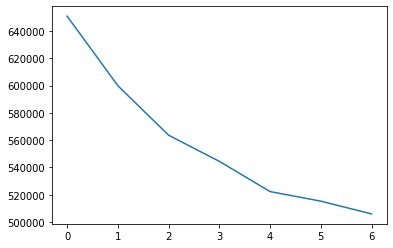

In [40]:
## Elbow curve i.e. sum of squared distances 
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters: 
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)  
    kmeans.fit(X_scaled)
    
    ssd.append(kmeans.inertia_)

#plot the ssd for each n_clusters  
plt.plot(ssd)


In [41]:
## silhouette analysis
silhouette = []
range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    ##initialise k-means 
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(X_scaled)
    
    cluster_labels = kmeans.labels_ 
    
    ##silhouette score 
    
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    
    print('for n_clusters={0}, the silhouette score is {1}'. format(num_clusters, silhouette_avg))
    silhouette.append(silhouette_avg)
    
    
plt.plot(range_n_clusters, silhouette)

NameError: name 'silhouette_score' is not defined

In [ ]:
center = kmeans.cluster_centers_
print(center)

In [ ]:
from numpy import sqrt, random, array, argsort
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt



In [ ]:
kmeans.labels_

In [ ]:
X_scaled['cluster_id'] = kmeans.labels_ ##assigning labels as cluster ids to the dataframe

X_scaled.head()

In [ ]:
variance_data['cluster_id'] = X_scaled['cluster_id']
variance_data['Stable Flag'] = profile['Stable Flag']

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score, classification_report

print(classification_report(variance_data['Stable Flag'], variance_data['cluster_id']))

In [ ]:
X_scaled['cluster_id'].value_counts()

In [ ]:
confusion_matrix(variance_data['cluster_id'], variance_data['Stable Flag'])

### ISOLATION FORESTS

In [ ]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [ ]:

# train isolation forest 
model =  IsolationForest(contamination = 0.48)
model.fit(X_scaled)


In [ ]:
# add the data to the main  
X_scaled['anomaly'] = pd.Series(model.predict(X_scaled))
X_scaled['anomaly'] = X_scaled['anomaly'].map( {1: 0, -1: 1} )
print(X_scaled['anomaly'].value_counts())

In [ ]:
variance_data['iso anomaly'] = X_scaled['anomaly']

In [ ]:
print(classification_report(variance_data['Stable Flag'], variance_data['iso anomaly']))

In [ ]:
confusion_matrix(variance_data['iso anomaly'], variance_data['Stable Flag'])

### Isolation forests and Local outlier

# Modeling

We will be using two unsupervised learning algorithms for anomaly detection.

####  1. ISOLATION FOREST

Isolation Forest is an unsupervised anomaly detection algorithm that uses the two properties “Few” and “Different” of anomalies to detect their existence. Since anomalies are few and different, they are more susceptible to isolation. This algorithm isolates each point in the data and splits them into outliers or inliers. This split depends on how long it takes to separate the points. If we try to separate a point which is obviously a non-outlier, it’ll have many points in its round, so that it will be really difficult to isolate. On the other hand, if the point is an outlier, it’ll be alone and we’ll find it very easily.

####  2. Local Outlier Factor

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It is a calculation that looks at the neighbors of a certain point to find out its density and compare this to the density of neighbour points later on. In short we can say that the density around an outlier object is significantly different from the density around its neighbors. LOF considers as outliers the samples that have a substantially lower density than their neighbors.

In [ ]:
X_scaled_new = X_scaled.drop(['cluster_id'], axis = 1)

In [ ]:
X_scaled_new['Stable Flag'] = profile['Stable Flag']

#### Split data into Inliers and Outliers

`Inliers` are values that are normal.`Outliers` are values that don't belong to normal data and they are the anomalies.

In [ ]:
inliers = X_scaled_new[X_scaled_new['Stable Flag']==0]
ins = inliers.drop(['Stable Flag'], axis=1)

outliers = X_scaled_new[X_scaled_new['Stable Flag']==1]
outs = outliers.drop(['Stable Flag'], axis=1)

ins.shape, outs.shape

In [ ]:
def normal_accuracy(values):
    
    tp=list(values).count(1)
    total=values.shape[0]
    accuracy=np.round(tp/total,4)
    
    return accuracy

def fraud_accuracy(values):
    
    tn=list(values).count(-1)
    total=values.shape[0]
    accuracy=np.round(tn/total,4)
    
    return accuracy

In [ ]:
#for modeling
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest


In [ ]:
state= 42

ISF = IsolationForest(random_state=state)
ISF.fit(ins)

normal_isf = ISF.predict(ins)
fraud_isf = ISF.predict(outs)

in_accuracy_isf=normal_accuracy(normal_isf)
out_accuracy_isf=fraud_accuracy(fraud_isf)
print("Accuracy in Detecting Stable Cases:", in_accuracy_isf)
print("Accuracy in Detecting Not stable Cases:", out_accuracy_isf)

In [ ]:
LOF = LocalOutlierFactor(novelty=True)
LOF.fit(ins)

normal_lof = LOF.predict(ins)
fraud_lof = LOF.predict(outs)

in_accuracy_lof=normal_accuracy(normal_lof)
out_accuracy_lof=fraud_accuracy(fraud_lof)
print("Accuracy in Detecting Stable Cases:", in_accuracy_lof)
print("Accuracy in Detecting Not stable Cases:", out_accuracy_lof)

In [ ]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize=[15,2])

ax1.set_title("Accuracy of Isolation Forest",fontsize=20)
sns.barplot(x=[in_accuracy_isf,out_accuracy_isf], 
            y=['Stable', 'Not Stable'],
            label="classifiers", 
            color="b", 
            ax=ax1)
ax1.set(xlim=(0,1))

ax2.set_title("Accuracy of Local Outlier Factor",fontsize=20)
sns.barplot(x=[in_accuracy_lof,out_accuracy_lof], 
            y=['Stable', 'Not Stable'], 
            label="classifiers", 
            color="r", 
            ax=ax2)
ax2.set(xlim=(0,1))
plt.show()